In [ ]:
#https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

In [6]:
import pandas as pd
df=pd.read_csv("housepricedata.csv")
df.head(2)


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1


In [7]:
#convert the dataset into arrays
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [8]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [9]:
from sklearn import preprocessing


In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale= min_max_scaler.fit_transform(X)

In [12]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [32]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [38]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [39]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [18]:
Y_train

array([0, 0, 1, ..., 0, 0, 1])

In [19]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [20]:
model = Sequential([    Dense(32, activation='relu', input_shape=(10,)),    Dense(32, activation='relu'),    Dense(1, activation='sigmoid'),])

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
#Second Step: Filling in the best numbers
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
hist = model.fit(X_train, Y_train,          batch_size=32, epochs=100,          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 40us/step - loss: 0.2123 - acc: 0.9100 - val_loss: 0.2784 - val_acc: 0.8721
Epoch 2/100
1022/1022 [==============================] - 0s 36us/step - loss: 0.2129 - acc: 0.9090 - val_loss: 0.2821 - val_acc: 0.8767
Epoch 3/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.2132 - acc: 0.9119 - val_loss: 0.2785 - val_acc: 0.8721
Epoch 4/100
1022/1022 [==============================] - 0s 36us/step - loss: 0.2143 - acc: 0.9080 - val_loss: 0.2785 - val_acc: 0.8721
Epoch 5/100
1022/1022 [==============================] - 0s 38us/step - loss: 0.2118 - acc: 0.9139 - val_loss: 0.2787 - val_acc: 0.8721
Epoch 6/100
1022/1022 [==============================] - 0s 35us/step - loss: 0.2124 - acc: 0.9110 - val_loss: 0.2794 - val_acc: 0.8630
Epoch 7/100
1022/1022 [==============================] - 0s 35us/step - loss: 0.2125 - acc: 0.9100 - val_loss: 0.2795 - val_acc: 0.8721
E

1022/1022 [==============================] - 0s 32us/step - loss: 0.2118 - acc: 0.9119 - val_loss: 0.2789 - val_acc: 0.8813
Epoch 61/100
1022/1022 [==============================] - 0s 33us/step - loss: 0.2110 - acc: 0.9119 - val_loss: 0.2797 - val_acc: 0.8767
Epoch 62/100
1022/1022 [==============================] - 0s 34us/step - loss: 0.2115 - acc: 0.9100 - val_loss: 0.2777 - val_acc: 0.8630
Epoch 63/100
1022/1022 [==============================] - 0s 34us/step - loss: 0.2109 - acc: 0.9129 - val_loss: 0.2794 - val_acc: 0.8767
Epoch 64/100
1022/1022 [==============================] - 0s 32us/step - loss: 0.2119 - acc: 0.9070 - val_loss: 0.2840 - val_acc: 0.8630
Epoch 65/100
1022/1022 [==============================] - 0s 35us/step - loss: 0.2122 - acc: 0.9100 - val_loss: 0.2861 - val_acc: 0.8630
Epoch 66/100
1022/1022 [==============================] - 0s 37us/step - loss: 0.2107 - acc: 0.9110 - val_loss: 0.2778 - val_acc: 0.8676
Epoch 67/100
1022/1022 [==============================

In [47]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 26us/step


0.8812785396292874

In [48]:
#Visualizing Loss and Accuracy
import matplotlib.pyplot as plt


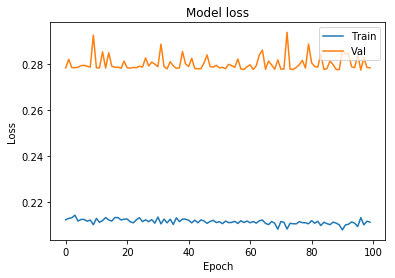

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

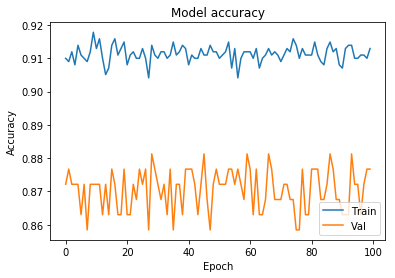

In [50]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [51]:
model_2 = Sequential([    Dense(1000, activation='relu', input_shape=(10,)),    Dense(1000, activation='relu'),    Dense(1000, activation='relu'),    Dense(1000, activation='relu'),    Dense(1, activation='sigmoid'),])

In [52]:
model_2.compile(optimizer='adam',              loss='binary_crossentropy',              metrics=['accuracy'])

In [53]:
hist_2 = model_2.fit(X_train, Y_train,          batch_size=32, epochs=100,          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.4743 - acc: 0.8014 - val_loss: 0.4335 - val_acc: 0.8037
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3369 - acc: 0.8689 - val_loss: 0.4690 - val_acc: 0.7580
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3022 - acc: 0.8767 - val_loss: 0.3837 - val_acc: 0.8447
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2713 - acc: 0.8894 - val_loss: 0.3532 - val_acc: 0.8402
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2730 - acc: 0.8933 - val_loss: 0.3352 - val_acc: 0.8539
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2436 - acc: 0.9002 - val_loss: 0.3646 - val_acc: 0.8447
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2759 - acc: 0.8855 - val_loss: 0.3414 - val_acc: 0.8447
Epoch 8/

Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1585 - acc: 0.9374 - val_loss: 0.3223 - val_acc: 0.8584
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1518 - acc: 0.9354 - val_loss: 0.4035 - val_acc: 0.8630
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1398 - acc: 0.9384 - val_loss: 0.4169 - val_acc: 0.8721
Epoch 64/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1306 - acc: 0.9472 - val_loss: 0.3693 - val_acc: 0.8584
Epoch 65/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1262 - acc: 0.9521 - val_loss: 0.4497 - val_acc: 0.8356
Epoch 66/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1461 - acc: 0.9403 - val_loss: 0.3976 - val_acc: 0.8721
Epoch 67/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1438 - acc: 0.9432 - val_loss: 0.3708 - val_acc: 0.8676
Epoch 68/100
1022/1022 [========================

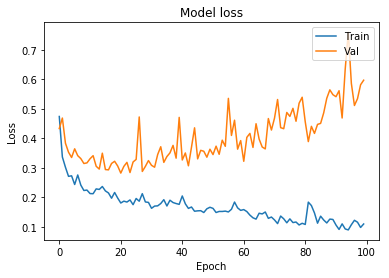

In [54]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

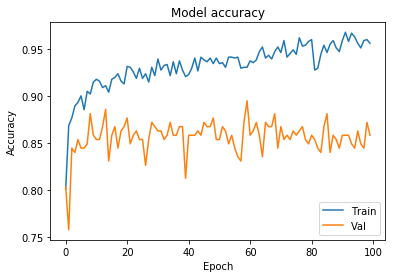

In [55]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [56]:
#regularization
from keras.layers import Dropout
from keras import regularizers

In [57]:
model_3 = Sequential([    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),    Dropout(0.3),    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    Dropout(0.3),    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    Dropout(0.3),    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    Dropout(0.3),    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [58]:
model_3.compile(optimizer='adam',              loss='binary_crossentropy',              metrics=['accuracy'])

In [59]:
hist_3 = model_3.fit(X_train, Y_train,          batch_size=32, epochs=100,          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 6s 6ms/step - loss: 14.4767 - acc: 0.6125 - val_loss: 3.9616 - val_acc: 0.8356
Epoch 2/100
1022/1022 [==============================] - 4s 4ms/step - loss: 1.6785 - acc: 0.8513 - val_loss: 0.7008 - val_acc: 0.8265
Epoch 3/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.5604 - acc: 0.8738 - val_loss: 0.5498 - val_acc: 0.8402
Epoch 4/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.4934 - acc: 0.8806 - val_loss: 0.5409 - val_acc: 0.8311
Epoch 5/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4778 - acc: 0.8777 - val_loss: 0.5261 - val_acc: 0.8447
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4525 - acc: 0.9012 - val_loss: 0.5142 - val_acc: 0.8630
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4795 - acc: 0.8738 - val_loss: 0.5687 - val_acc: 0.8128
Epoch 8

Epoch 61/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4096 - acc: 0.8982 - val_loss: 0.4627 - val_acc: 0.8584
Epoch 62/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4108 - acc: 0.8875 - val_loss: 0.4589 - val_acc: 0.8584
Epoch 63/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4192 - acc: 0.8885 - val_loss: 0.4834 - val_acc: 0.8447
Epoch 64/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4515 - acc: 0.8796 - val_loss: 0.4879 - val_acc: 0.8493
Epoch 65/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4293 - acc: 0.8914 - val_loss: 0.4788 - val_acc: 0.8584
Epoch 66/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4402 - acc: 0.8748 - val_loss: 0.4589 - val_acc: 0.8584
Epoch 67/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4099 - acc: 0.8943 - val_loss: 0.4545 - val_acc: 0.8630
Epoch 68/100
1022/1022 [========================

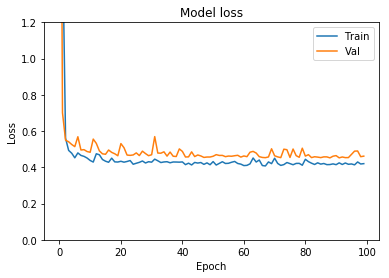

In [60]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

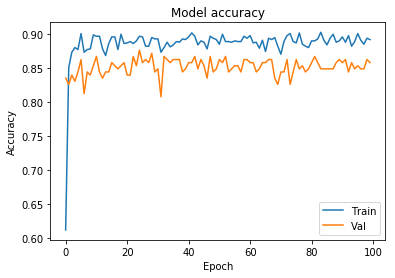

In [61]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()